<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Data Preparation

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Load and prepare the dataset
data = pd.read_csv('/content/Classification_Data.csv')  # load the CSV file
data["admitted"] = data["admitted"].map({"yes": 1, "no": 0})  # convert yes/no to 1/0
data.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


🧠 Explanation:
- pd.read_csv(): Loads the CSV file into a DataFrame.

- map(): Converts categorical labels to numerical so the algorithm can work with them.

In [ ]:
# Step 3: Feature selection
x = data[['gmat', 'gpa', 'work_experience']]  # independent variables
y = data['admitted']  # target variable (what we want to predict)


- x: Your features or predictors.

- y: Your label (1 = admitted, 0 = not admitted).

In [ ]:
# Step 4: Split the data into training and testing sets
# Splitting data with test size of 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


- train_test_split: Randomly divides data — 75% for training, 25% for testing.

- random_state=0: Ensures results are repeatable (same random split every time).

In [ ]:
# Step 5: Build our logistic model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.80


# Logistic Regression Distribution

<Axes: xlabel='gmat', ylabel='admitted'>

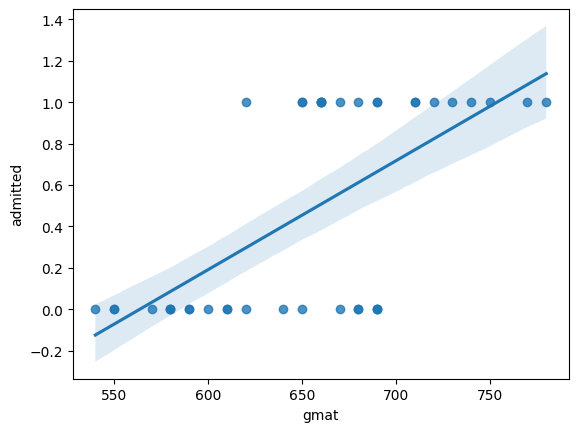

In [ ]:
import seaborn as sns
sns.regplot(x='gmat',y='admitted',data=data)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



# Building and train the KNN mode

In [ ]:
# Step 5: Build and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # Create KNN with K=3
knn.fit(x_train, y_train)  # Train the model using training data


KNeighborsClassifier(n_neighbors=3)

- KNeighborsClassifier(n_neighbors=3): Chooses 3 nearest neighbors to vote.

- .fit(): Memorizes training data — no real learning, just stores it.

In [ ]:
# Step 6: Make predictions
y_pred = knn.predict(x_test)  # Predict outcomes for test data


- predict(): Compares test points to training data and uses majority voting to classify.

In [ ]:
# Step 7: Evaluate the model
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))


Accuracy: 0.70


- accuracy_score: Measures how many predictions were correct.

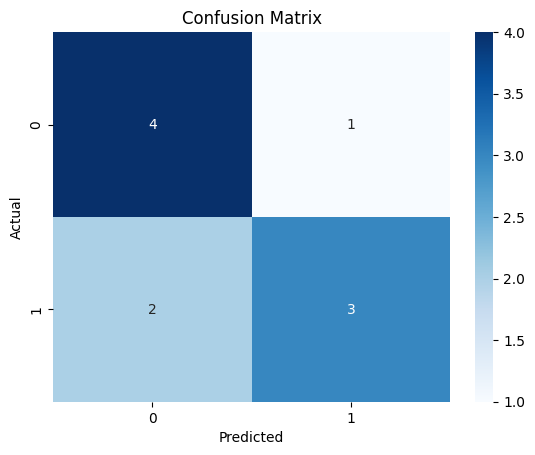

In [ ]:
# Step 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Get confusion matrix values
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Plot heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


This code block shows a colored confusion matrix:

- Top-left = True Positives

- Bottom-right = True Negatives

- Others = errors (False Positives/Negatives)

In [ ]:
# Step 9: Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



- Shows precision, recall, f1-score for both classes.

- Helps understand where your model does well or poorly.

### Real-World Application:

- Students can apply this same structure to:

- Predict whether a customer will buy a product based on past behavior.

- Predict if a patient is at risk of disease based on health metrics.

- Classify emails as spam or not spam.

# Give Students to perform this as a Practice

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Example dataset
data = {
    'weight': [150, 160, 170, 180, 190, 200, 210, 220],
    'texture': [7, 6, 5, 4, 3, 2, 1, 0],  # 0 = smooth, 7 = rough
    'label': ['apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'banana', 'banana']
}
df = pd.DataFrame(data)

# Feature selection and target
X = df[['weight', 'texture']]
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

# Evaluate the model
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Training Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         2
      banana       1.00      1.00      1.00         2
      orange       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Testing Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         1
      orange       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


# Perform together with students

Imagine you're trying to find the **best number of neighbors** to look at when using a **K-Nearest Neighbors (KNN)** model — a type of algorithm that makes predictions by looking at the “closest” training examples.

### Step-by-step explanation:

1. **Try different values of K (number of neighbors):**
   The code tests out several versions of the KNN model, each time using a different number of neighbors (from 1 up to 20 or less, depending on how much training data you have).

2. **Train and test the model:**
   For each value of K, it:

   * Trains the model using your training data.
   * Uses the model to make predictions on your test data.
   * Checks how accurate the predictions are (i.e., how many it got right).

3. **Store the accuracy:**
   It keeps track of how accurate the model was for each value of K.

4. **Print the accuracy:**
   It prints the accuracy for each K value so you can see which one performs best.

5. **Plot the results:**
   Finally, it draws a graph showing how the accuracy changes as you increase K. This graph helps you visually find the “elbow point” — a good balance where increasing K stops giving better accuracy.




k=1, Accuracy=1.0
k=2, Accuracy=0.5
k=3, Accuracy=1.0
k=4, Accuracy=0.5
k=5, Accuracy=0.5
k=6, Accuracy=0.5


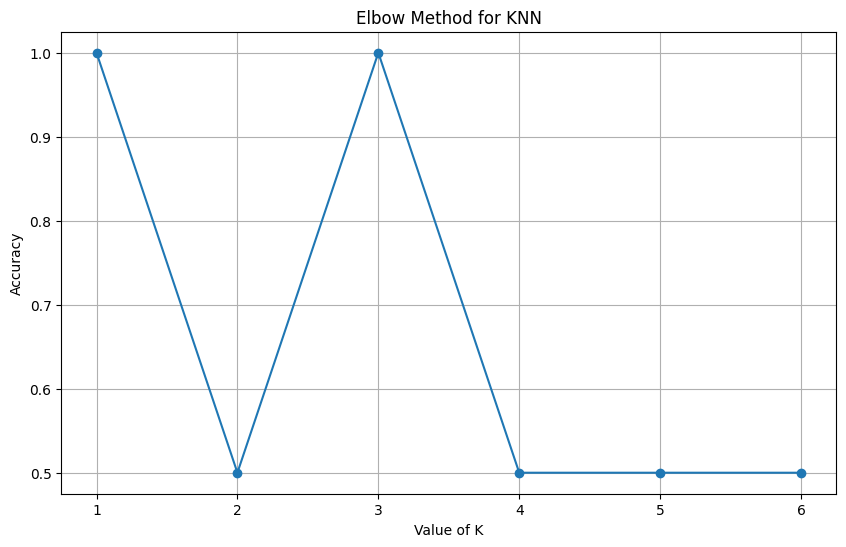

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

scores = []
max_k = min(20, len(X_train_scaled))  # Max K is 20 or number of training samples

# Try different values of K (number of neighbors): The code tests out several versions of the KNN model, each time using a different number of neighbors (from 1 up to 20 or less, depending on how much training data you have).
for k in range(1, max_k + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)   # Uses the model to make predictions on your test data.
    accuracy = accuracy_score(y_test, predictions) # Checks how accurate the predictions are (i.e., how many it got right).
    print(f'k={k}, Accuracy={round(accuracy, 2)}')
    scores.append(accuracy)

# Plot the results: Finally, it draws a graph showing how the accuracy changes as you increase K. This graph helps you visually find the “elbow point” — a good balance where increasing K stops giving better accuracy.
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), scores, marker='o')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Elbow Method for KNN')
plt.grid()
plt.show()
